# Оптимизация инвестиционного портфеля по Марковицу

Подключим необходимые библиотеки

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/QuantumTechnologies/

Mounted at /content/drive/
/content/drive/MyDrive/QuantumTechnologies


# Загрузка данных
Загрузим файл с относительными изменениями котировок за день для N = 10

In [ ]:
data = pd.read_csv('./DATA_B_N=10_LENGTH=200.txt',delimiter=' ', header=None)
data = data.transpose()
N = len(data.columns)
data.tail()

,0,1,2,3,4,5,6,7,8,9
195,0.030983,0.002649,-0.045403,0.005932,-0.041809,0.047514,0.009154,0.004293,0.025168,-0.032413
196,0.007987,-0.030350,0.001953,-0.000690,0.033498,0.013519,0.025565,0.027177,-0.026576,-0.029240
197,0.023218,-0.042612,0.024042,0.038201,-0.029963,0.020655,0.014212,0.005058,-0.003072,-0.018638
198,0.045031,-0.011010,0.021243,-0.036962,0.033506,0.005156,-0.004217,0.008262,0.024075,0.003219
199,-0.028205,-0.042231,-0.003134,-0.001521,-0.030100,-0.003298,-0.023260,0.048995,0.001797,-0.019074


## Графики относительных изменений стоимости ценных бумаг


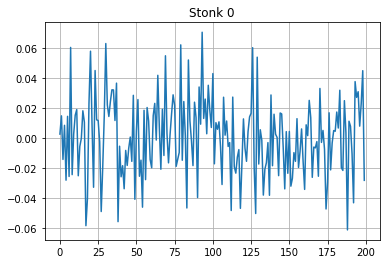

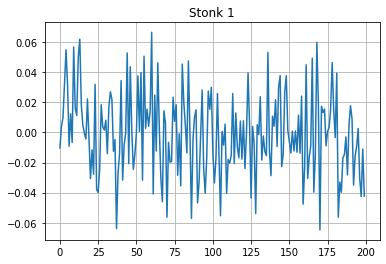

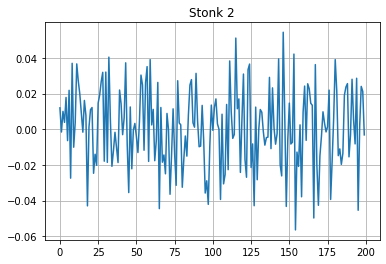

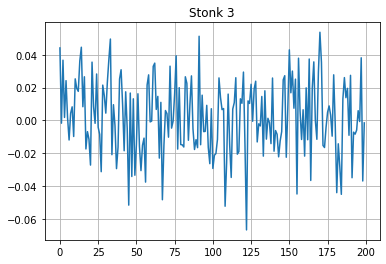

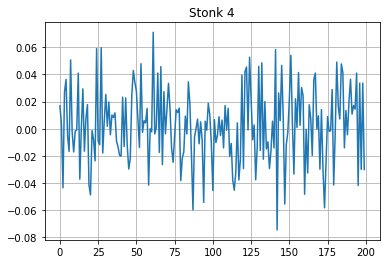

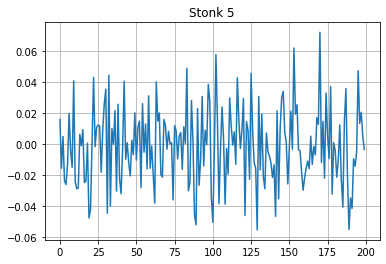

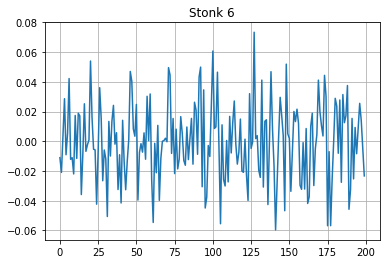

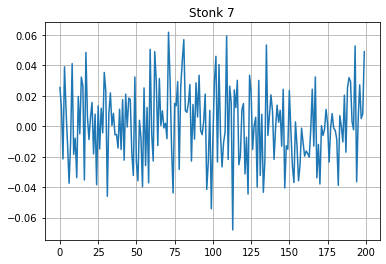

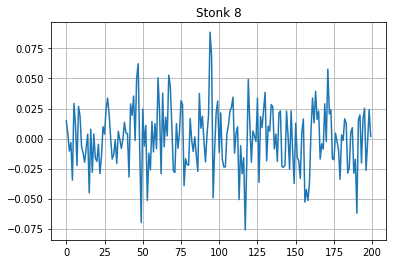

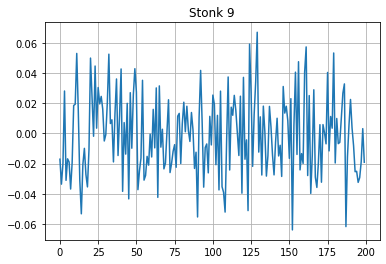

In [ ]:
for stonk in data.columns:
    data[stonk].plot()
    plt.title("Stonk " + str(stonk))
    plt.grid()
    plt.show()

## Средняя доходность
Вектор средней дневной доходности.

In [ ]:
R = data.mean()
R

0    0.000602
1   -0.001023
2    0.000852
3    0.001872
4    0.002053
5   -0.001218
6   -0.000289
7    0.000973
8    0.000299
9   -0.001012
dtype: float64

# Ковариация
Необходимо построить матрицу дневных ковариаций на данном временном промежутке

In [ ]:
cov = data.cov()
cov

,0,1,2,3,4,5,6,7,8,9
0,0.000672,0.000043,-0.000056,0.000012,-0.000009,-0.000039,0.000056,-0.000017,0.000016,-0.000003
1,0.000043,0.000747,0.000014,0.000028,0.000018,-0.000094,-0.000003,-0.000035,0.000008,-0.000040
2,-0.000056,0.000014,0.000489,0.000044,-0.000027,-0.000041,0.000046,0.000046,-0.000038,0.000015
3,0.000012,0.000028,0.000044,0.000520,-0.000006,0.000036,-0.000029,-0.000021,-0.000049,0.000047
4,-0.000009,0.000018,-0.000027,-0.000006,0.000739,-0.000071,-0.000079,0.000055,-0.000069,-0.000056
5,-0.000039,-0.000094,-0.000041,0.000036,-0.000071,0.000606,-0.000017,-0.000005,0.000053,-0.000054
6,0.000056,-0.000003,0.000046,-0.000029,-0.000079,-0.000017,0.000660,0.000074,0.000013,0.000017
7,-0.000017,-0.000035,0.000046,-0.000021,0.000055,-0.000005,0.000074,0.000627,0.000005,-0.000021
8,0.000016,0.000008,-0.000038,-0.000049,-0.000069,0.000053,0.000013,0.000005,0.000668,-0.000060
9,-0.000003,-0.000040,0.000015,0.000047,-0.000056,-0.000054,0.000017,-0.000021,-0.000060,0.000688


#Ответ на задание B1

Посчитаем сумму элементов ковариационной матрицы и вектора средней дневной доходности

In [ ]:
print(cov.values.sum())
print(R.sum())

0.005827449513176478
0.0031101777464093323


#Случайные бинарные портфели

Научимся генерировать случайные бинарные портфели - вектора размерности N со значениями 0 и 1

In [ ]:
def randBinPortf():
  return np.random.randint(2, size=N)

# Расчёт доходности и риска портфеля
 

Доходность портфеля считаем как скалярное произведение вектора средней дневной доходности на s

Риск оценивается первым слагаемым в формуле Марковица



In [ ]:
def dohPortf(s):
  return np.matmul(R.values,s)
def riskPortf(s):
  return np.matmul(np.matmul(s,cov.values),s)

In [ ]:
s = randBinPortf()

print(dohPortf(s))
print(riskPortf(s))

-0.0011997862196874442
0.002185694275773901


# Генерация всех бинарных портфелей

Используем рекурсивную функцию *generateAllBinaryStrings*, чтобы сгенерировать все 2^N возможных бинарных портфелей

In [ ]:
arr = [None] * N

AllBinaryStrings = np.zeros((2 ** N,N)).astype(int)
k = 0


def generateAllBinaryStrings(N, arr, i):  
    global k
    if i == N:
        AllBinaryStrings[k] = arr
        k += 1
        return 
        
    arr[i] = 0
    generateAllBinaryStrings(N, arr, i + 1)  
    
    arr[i] = 1
    generateAllBinaryStrings(N, arr, i + 1)  

generateAllBinaryStrings(N, arr, 0)  
print(AllBinaryStrings)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 ...
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]]


# Полный перебор

In [ ]:
L = 2 ** N

risk = np.zeros(L)
doh = np.zeros(L)
Q = np.zeros(L)
portf = np.zeros((L,N))

for i in range(L):

  r = AllBinaryStrings[i]
    
  portf[i,:] = r
  risk[i] = riskPortf(r)
  doh[i] = dohPortf(r)
  Q[i] = risk[i] - doh[i]

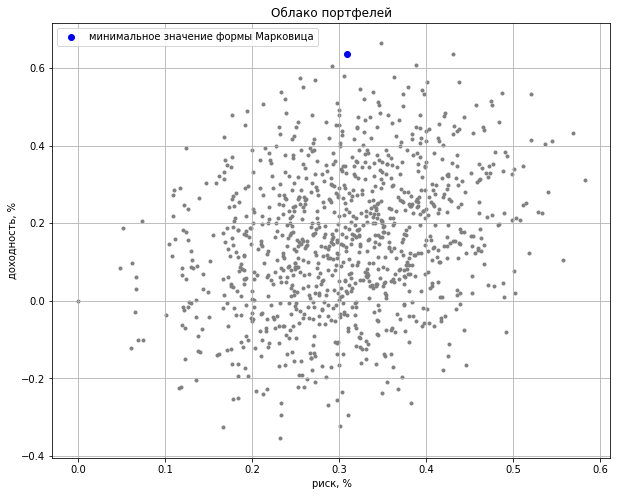

In [ ]:
plt.figure(figsize=(10,8))

plt.scatter(risk*100,doh*100,c='gray',marker='.')
plt.xlabel('риск, %')
plt.ylabel('доходность, %')
plt.title("Облако портфелей")
plt.grid()

minQ = np.argmin(risk-doh)
plt.scatter([risk[minQ]*100],[doh[minQ]*100],c='b',marker='o',label='минимальное значение формы Марковица')

plt.legend()

plt.show()

In [ ]:
print('Минимальное значение квадратичной формы Марковица')
print()
print("риск = %1.5f%%" % (float(risk[minQ])*100.))
print("доходность = %1.5f%%" % (float(doh[minQ])*100.)) 
print("Q = %1.5f" % (float(Q[minQ]))) 
print()
print(AllBinaryStrings[minQ])
print()

Минимальное значение квадратичной формы Марковица

риск = 0.30877%
доходность = 0.63519%
Q = -0.00326

[1 0 1 1 1 0 0 1 0 0]



# Модель Изинга
Перепишем задачу в формализме Изинга


In [ ]:
J = cov/4
h =  (-R + cov.sum(axis=1))/2
E0 = - R.sum()/2 + cov.values.sum()/ 4 

def Hamiltonian(S):
  Ham =  np.matmul(np.matmul(S,J.values),S) + np.matmul(h.values,S) + E0
  return Ham

In [ ]:
L = 2 ** N
H = np.zeros(L)

for i in range(L):
  S =  2 * AllBinaryStrings[i] - 1 
  portf[i,:] = S
  H[i] = Hamiltonian(S)

Sopt = np.argmin(H)
riskSopt = riskPortf(AllBinaryStrings[Sopt])
dohSopt = dohPortf(AllBinaryStrings[Sopt])


print('Минимальное значение энергии Изинга')
print()
print("Emin = %1.5f" % (H[Sopt])) 
print()
print('S :')
print(2 * AllBinaryStrings[minQ] - 1)
print()
print('Лучший бинарный портфель')
print("риск = %1.5f%%" % (float(riskSopt)*100.))
print("доходность = %1.5f%%" % (float(dohSopt)*100.)) 
print("Q = %1.5f" % (float(riskSopt - dohSopt))) 
print()
print('s :')
print(AllBinaryStrings[minQ])
print()

Минимальное значение энергии Изинга

Emin = -0.00326

S :
[ 1 -1  1  1  1 -1 -1  1 -1 -1]

Лучший бинарный портфель
риск = 0.30877%
доходность = 0.63519%
Q = -0.00326

s :
[1 0 1 1 1 0 0 1 0 0]



# Noisy mean-field annealing
Реализуем алгоритм из статьи. Число итераций фиксироно (1000). Так как numpy позволяет очень легко работать с массивами поэлементно, можно реже обращаться к циклам

In [ ]:
from math import tanh

tf = 1000
def NMFA(N, h,J,powTs,powTf,sigma,alpha):
  S = np.zeros(N)
  T = 10 ** (np.linspace(powTs, powTf, num=int(tf)));
  PhiNorm = h ** 2 + (J ** 2).sum(axis=1)

  for t in range(tf):
    Phi = (h + np.matmul(S,J.values)) / PhiNorm + np.random.normal(0, sigma, N)
    Shat = - np.tanh(Phi / T[t])
    S = alpha * Shat + (1 - alpha) * S

  return np.sign(S).astype(int)


# Обработка N = 50


In [ ]:
data50 = pd.read_csv('./DATA_B_N=50_LENGTH=200.txt',delimiter=' ', header=None)
data50 = data50.transpose()
N2 = len(data50.columns)

R50 = data50.mean()
cov50 = data50.cov()

J50 = cov50/4
h50 =  (-R50 + cov50.sum(axis=1))/2
E0_50 = - R50.sum()/2 + cov50.values.sum()/ 4 

def Hamiltonian50(S):
  Ham =  np.matmul(np.matmul(S,J50.values),S) + np.matmul(h50.values,S) + E0_50
  return Ham

# Обработка N = 150


In [ ]:
data150 = pd.read_csv('./DATA_B_N=150_LENGTH=200.txt',delimiter=' ', header=None)
data150 = data150.transpose()
N3 = len(data150.columns)

R150 = data150.mean()
cov150 = data150.cov()

J150 = cov150/4
h150 =  (-R150 + cov150.sum(axis=1))/2
E0_150 = - R150.sum()/2 + cov150.values.sum()/ 4 

def Hamiltonian150(S):
  Ham =  np.matmul(np.matmul(S,J150.values),S) + np.matmul(h150.values,S) + E0_150
  return Ham

# Brute force оптимизация параметров

In [ ]:
from scipy import optimize
from scipy.optimize import Bounds

def NMFAopt(z):
  powTs,powTf,sigma,alpha = z
  S = NMFA(N, h,J,powTs,powTf,sigma,alpha)
  H = Hamiltonian(S)
  return H

def NMFAopt50(z):
  powT50s,powT50f,sigma50,alpha50 = z
  S = NMFA(N2,h50,J50,powT50s,powT50f,sigma50,alpha50)
  H = Hamiltonian50(S)
  return H

def NMFAopt150(z):
  powT150s,powT150f,sigma150,alpha150 = z
  S = NMFA(N3,h150,J150,powT150s,powT150f,sigma150,alpha150)
  H = Hamiltonian150(S)
  return H  


In [ ]:
rranges =(slice(1, 2, 1),slice(-3, -1, 1),slice(0.05, 0.5, 0.2),slice(0.05, 0.4, 0.2))

minimizator = optimize.brute(NMFAopt, rranges , full_output=True, finish=optimize.fmin, workers=100)

In [ ]:
minimizator_50 = optimize.brute(NMFAopt50, rranges , full_output=True, finish=optimize.fmin, workers=100)

In [ ]:
minimizator_150 = optimize.brute(NMFAopt150, rranges , full_output=True, finish=optimize.fmin, workers=100)

In [ ]:
print("N = 10")
print()
print("Best parameters:")
print("Ts = 10e%1.1f, Tf =  10e%2.1f, sigma = %3.2f, alpha = %4.2f" % tuple(minimizator[0]))
print()
print("Reached minimum")
print("H = %1.5f" % minimizator[1])

N = 10

Best parameters:
Ts = 10e1.0, Tf =  10e-3.0, sigma = 0.01, alpha = 0.20

Reached minimum
H = -0.00326


In [ ]:
print("N = 50")
print()
print("Best parameters:")
print("Ts = 10e%1.1f, Tf =  10e%2.1f, sigma = %3.2f, alpha = %4.2f" % tuple(minimizator_50[0]))
print()
print("Reached minimum")
print("H = %1.5f" % minimizator_50[1])

N = 50

Best parameters:
Ts = 10e1.0, Tf =  10e-3.0, sigma = 0.05, alpha = 0.05

Reached minimum
H = -0.03780


In [ ]:
print("N = 150")
print()
print("Best parameters:")
print("Ts = 10e%1.1f, Tf =  10e%2.1f, sigma = %3.2f, alpha = %4.2f" % tuple(minimizator[0]))
print()
print("Reached minimum")
print("H = %1.5f" % Hamiltonian150(S150best))

N = 150

Best parameters:
Ts = 10e1.0, Tf =  10e-3.0, sigma = 0.05, alpha = 0.25

Reached minimum
H = -0.12240


In [ ]:
powTs = 1
powTf = -3
sigma = 0.05;
alpha = 0.20

S10best = NMFA(N, h,J,powTs,powTf,sigma,alpha)

Hamiltonian(S10best)

-0.0032642388202606546

In [328]:
powT50s = 1
powT50f = -3
sigma50 = 0.05;
alpha50 = 0.1

S50best = NMFA(N2,h50,J50,powT50s,powT50f,sigma50,alpha50)
Hamiltonian50(S50best)

-0.03780491278374188

In [ ]:
powT150s = 1
powT150f = -3

sigma150 = 0.01;
alpha150 = 0.05

S150best = NMFA(N3,h150,J150,powT150s,powT150f,sigma150,alpha150)

Hamiltonian150(S150best)

-0.12240040182033868

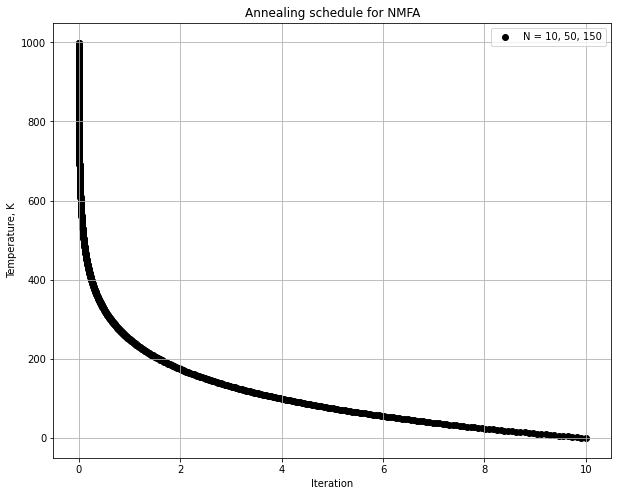

In [ ]:
T = 10 ** (np.linspace(powTs, powTf, num=tf));

plt.figure(figsize=(10,8))

plt.xlabel('Iteration')
plt.ylabel('Temperature, K')
plt.title("Annealing schedule for NMFA")
plt.grid()

plt.scatter(T,range(tf),c='k',marker='o',label='N = 10, 50, 150')

plt.legend()
plt.savefig('Annealing_schedule.png')
plt.show()

In [ ]:
def NMFAPlotter(N, h,J,powTs,powTf,sigma,alpha):
  S = np.zeros((tf,N))
  T = 10 ** (np.linspace(powTs, powTf, num=int(tf)));
  PhiNorm = h ** 2 + (J ** 2).sum(axis=1)

  for t in range(tf-1):
    Phi = (h + np.matmul(S[t],J.values)) / PhiNorm + np.random.normal(0, sigma, N)
    Shat = - np.tanh(Phi / T[t])
    
    S[t+1] = alpha * Shat + (1 - alpha) * S[t]
  return S

S = NMFAPlotter(N, h,J,powTs,powTf,sigma,alpha)
S50 = NMFAPlotter(N2,h50,J50,powT50s,powT50f,sigma50,alpha50)
S150 = NMFAPlotter(N3,h150,J150,powT150s,powT150f,sigma150,alpha150)


No handles with labels found to put in legend.


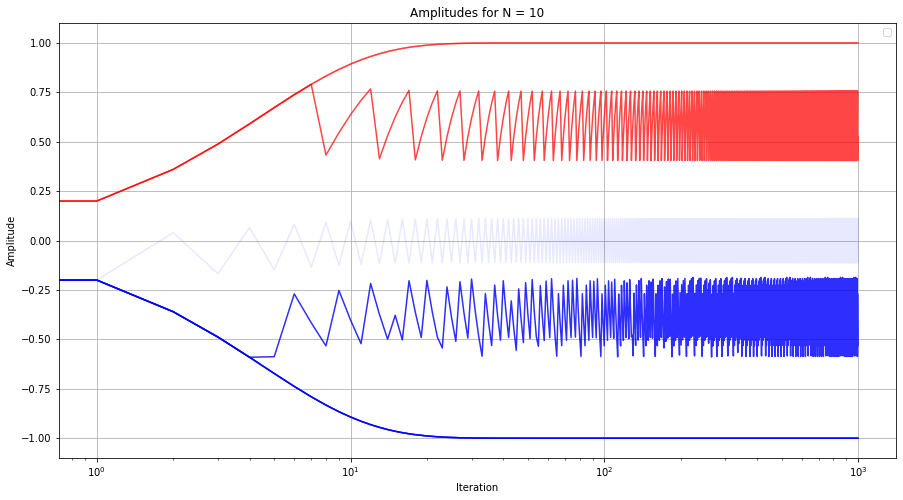

In [ ]:
plt.figure(figsize=(15,8))

plt.xlabel('Iteration')
plt.ylabel('Amplitude')
plt.title("Amplitudes for N = 10")
plt.grid()

for y in range(N):
  if S[tf -1, y] > 0:
    spindircolor = "r"
  else:
    spindircolor = "b"
  op = (y + 1) / (N + 1)
  plt.semilogx(range(tf),S[:,y],color=spindircolor, alpha = op)

plt.legend()
plt.show()

No handles with labels found to put in legend.


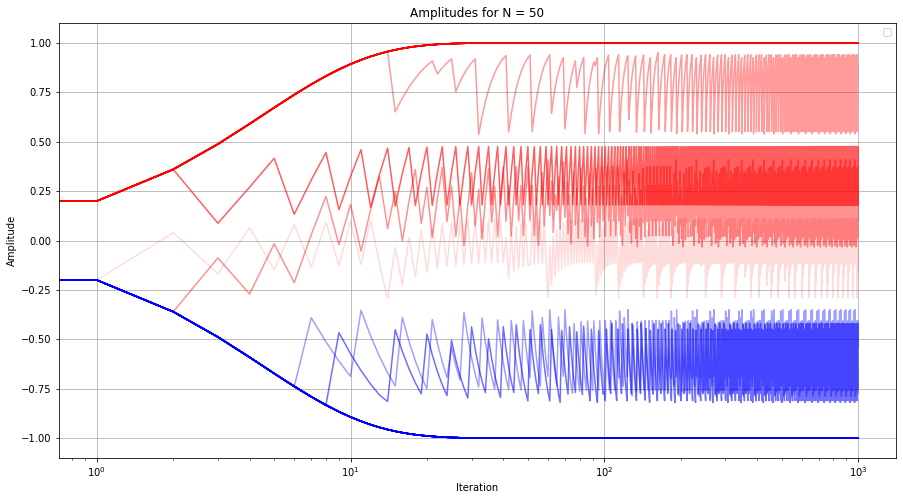

In [ ]:
plt.figure(figsize=(15,8))

plt.xlabel('Iteration')
plt.ylabel('Amplitude')
plt.title("Amplitudes for N = 50")
plt.grid()

for y in range(N2):
  if S50[tf -1, y] > 0:
    spindircolor = "r"
  else:
    spindircolor = "b"
  op = (y + 1) / (N2 + 1)
  plt.semilogx(range(tf),S50[:,y],color=spindircolor, alpha = op)

plt.legend()
plt.show()

No handles with labels found to put in legend.


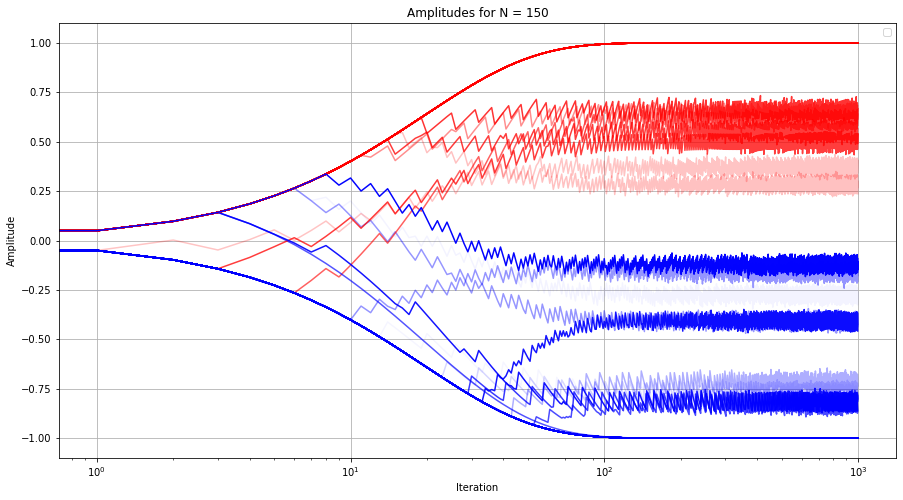

In [ ]:
plt.figure(figsize=(15,8))

plt.xlabel('Iteration')
plt.ylabel('Amplitude')
plt.title("Amplitudes for N = 150")
plt.grid()

for y in range(N3):
  if S150[tf -1, y] > 0:
    spindircolor = "r"
  else:
    spindircolor = "b"
  op = (y + 1) / (N3 + 1)
  plt.semilogx(range(tf),S150[:,y],color=spindircolor, alpha = op)

plt.legend()
plt.show()

# Вычисление вероятности получения минимального значения

In [330]:
test_size = 5
eps = 10e-7
Hmin = Hamiltonian(S10best)
Hmin50 = Hamiltonian50(S50best)
Hmin150 = Hamiltonian150(S150best)

coincedences = 0
for i in range(test_size):
  s = NMFA(N, h,J,powTs,powTf,sigma,alpha)
  if abs(Hamiltonian(s) - Hmin) < eps:
    coincedences += 1
print("For test size %1.i" % test_size, "success probability for N = 10 is equal to %1.5f" % float(coincedences/test_size))
  

For test size 5 success probability for N = 10 is equal to 1.00000


In [334]:
coincedences = 0
for i in range(test_size):
  s = NMFA(N2, h50,J50,powT50s,powT50f,sigma50,alpha50)
  if abs(Hamiltonian50(s) - Hmin50) < eps:
    coincedences += 1
print("For test size %1.i" % test_size, "success probability for N = 50 is equal to %1.5f" % float(coincedences/test_size))

For test size 5 success probability for N = 50 is equal to 1.00000


In [333]:
coincedences = 0
for i in range(test_size):
  s = NMFA(N3, h150,J150,powT150s,powT150f,sigma150,alpha150)
  if abs(Hamiltonian150(s) - Hmin150) < eps:
    coincedences += 1
print("For test size %1.i" % test_size, "success probability for N = 150 is equal to %1.5f" % float(coincedences/test_size))
    

For test size 5 success probability for N = 150 is equal to 1.00000
